<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Machine Learning Methods: K-Nearest Neighbour</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Information Source from Monash Faculty of Information Technology

---

### **K-Nearest Neighbour**

In the K-nearest neighbour algorithm, we treat all training instances as points positioned in n-dimensional space, each with a corresponding target value. A new instance gets classified by locating its k closest neighbours within this n-dimensional space and choosing the class label that appears most frequently among those neighbours. Each instance **x** = (v₁, v₂, ..., vₙ) has an associated target value **y**

#### **Classification Process for New Instance**
1. **Locate the closest neighbours**
2. **Conduct a majority vote from the neighbours**

#### **1-nearest neighbour**
Consider data points plotted in 2D space labeled as either orange or blue, with a new point currently shown in pink that needs classification.

Using 1-nearest neighbour, we identify the single closest point to the pink point, which happens to be a orange point. We perform a majority vote, resulting in orange classification, so we assign the pink point as orange.

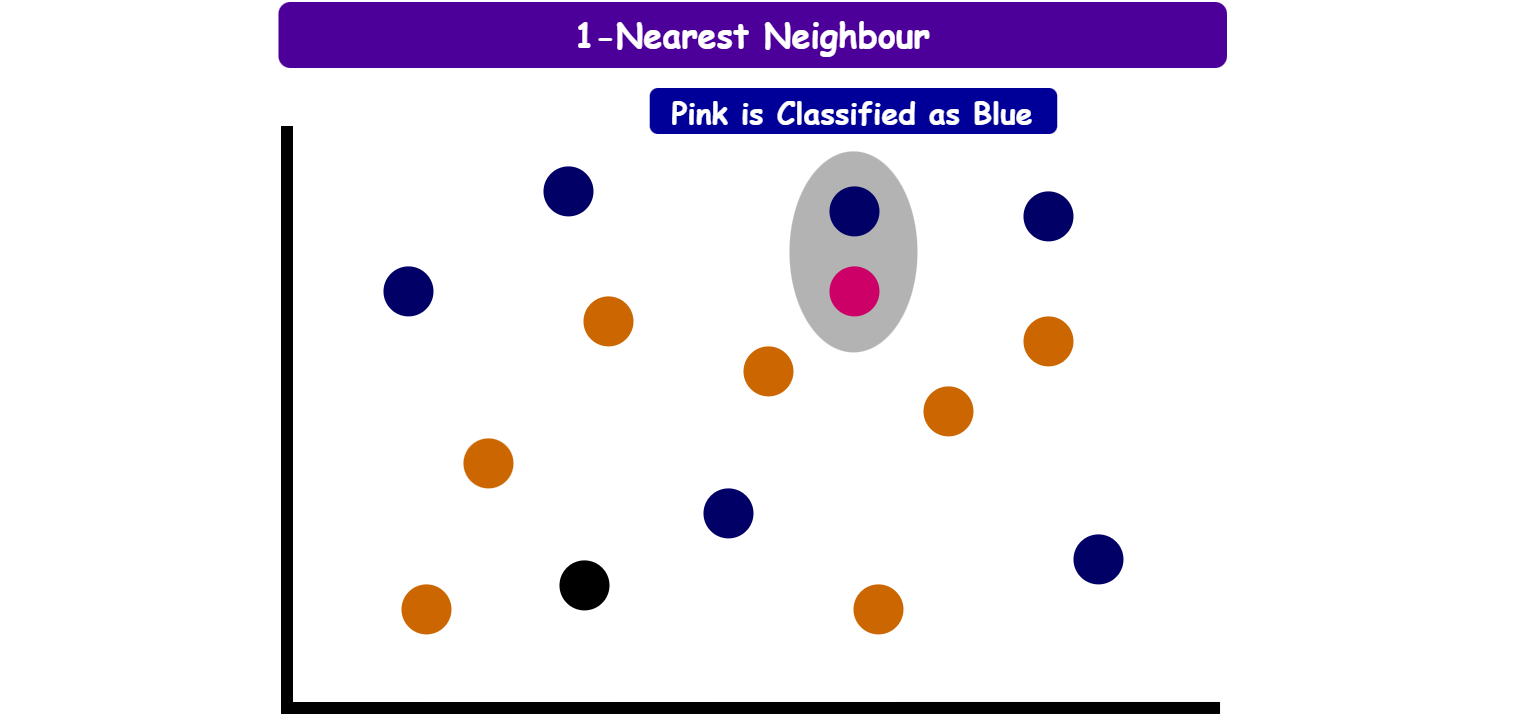

#### **3-nearest neighbour**
Alternatively, when applying 3-nearest neighbour, we search for the 3 closest points to our pink point and discover two blue points and one orange point. Consequently, our majority vote would classify the pink point as blue.

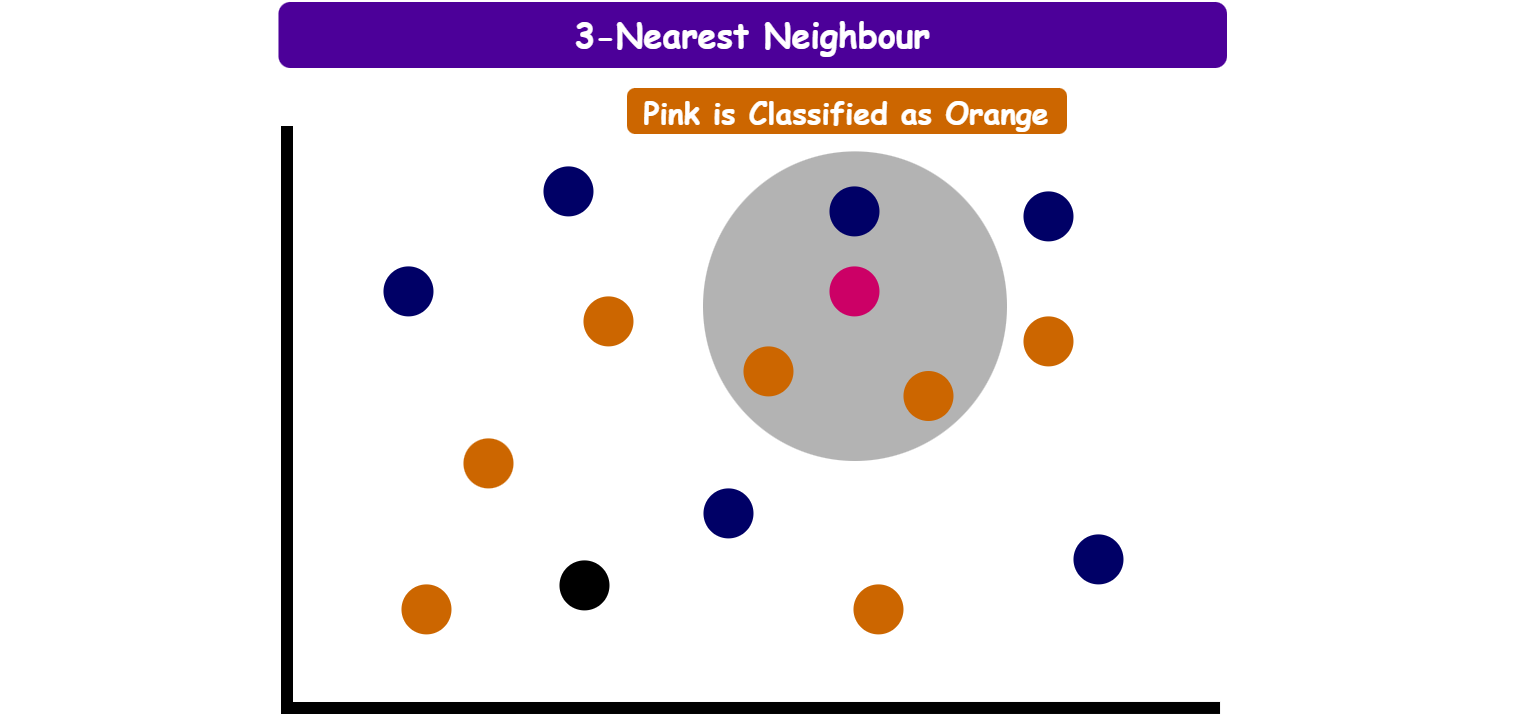

#### **Computing Similarity**

**Measuring distance between different instances**

When our data features are continuous, we apply Euclidean distance, and when our features are categorical, we use the Jaccard coefficient.

For instance, if an instance is represented by (v₁, v₂, ..., vₙ), vₖ represents the value of the k-th feature.

**Continuous features: Euclidean distance**
$$Ed(x_i, x_j) = \sqrt{\sum_{k=1}^{n}(v_{ik} - v_{jk})^2}$$

**Categorical features: Jaccard coefficient**
$$Jc(x_i, x_j) = \frac{|[v_{i1},...,v_{in}] \cap [v_{j1},...,v_{jn}]|}{|[v_{i1},...,v_{in}] \cup [v_{j1},...,v_{jn}]|}$$

#### **Example**

**Euclidean distance**
For continuous data, we apply the Euclidean distance:

Continuous features: x₁ = {0.7, 30, 80, 10}, x₂ = {0.2, 32, 85, 40}

$$Ed(x_i, x_j) = \sqrt{(0.7 - 0.2)^2 + (30 - 32)^2 + (80 - 85)^2 + (10 - 40)^2}$$
$$= 30.48$$

**Jaccard coefficient**
For categorical features, we apply the Jaccard coefficient:

Categorical features: x₁ = {red, large, smooth, hard}, x₂ = {blue, large, smooth, soft}

$Jc(x_i, x_j) = \frac{|{red,large,smooth,hard} \cap {blue,large,smooth,soft}|}{|{red,large,smooth,hard} \cup {blue,large,smooth,soft}|}$
$= \frac{|{large,smooth}|}{|{red,blue,large,smooth,hard,soft}|} = \frac{2}{6} = 0.33$

The intersection of the categorical features contains two elements, and the union contains six. Therefore the Jaccard coefficient is ⅓.

#### **Parameter Learning**

**No training exists in this algorithm.** The training data and distance functions are all we need for the algorithm to function.

The model essentially **memorises** the entire 'training' data and references it whenever it needs to classify a new instance. This means that additional data causes the model to expand and demands more distance calculations for every classification. This makes the algorithm extremely straightforward overall but potentially quite slow.

---

### **Worked Example: K-Nearest Neighbour**

Given the following 3D dataset with associated class labels, classify a new data point using K-nearest neighbour.

**Dataset:**
| x₁ | x₂ | x₃ | Class |
|----|----|----|-------|
| 3  | 5  | 3  | 1     |
| 2  | 0  | 4  | 0     |
| 6  | 3  | 7  | 1     |
| 3  | 7  | 5  | 1     |
| 0  | 1  | 1  | 0     |
| 1  | 2  | 2  | 0     |

**New data point:** x = (x₁ = 3, x₂ = 3, x₃ = 3)

**Questions:**
1. What class would a 1-nearest neighbour predict for x?
2. What class would a 3-nearest neighbour predict for x?

**Step 1: Calculate Euclidean distances from the new point to all training points**

Using the Euclidean distance formula:
$$Ed(x_i, x_j) = \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2 + (x_{i3} - x_{j3})^2}$$

For new point x = (3, 3, 3):

**Distance to point 1:** (3, 5, 3, Class 1)
$$Ed = \sqrt{(3-3)^2 + (3-5)^2 + (3-3)^2} = \sqrt{0 + 4 + 0} = \sqrt{4} = 2.0$$

**Distance to point 2:** (2, 0, 4, Class 0)
$$Ed = \sqrt{(3-2)^2 + (3-0)^2 + (3-4)^2} = \sqrt{1 + 9 + 1} = \sqrt{11} ≈ 3.32$$

**Distance to point 3:** (6, 3, 7, Class 1)
$$Ed = \sqrt{(3-6)^2 + (3-3)^2 + (3-7)^2} = \sqrt{9 + 0 + 16} = \sqrt{25} = 5.0$$

**Distance to point 4:** (3, 7, 5, Class 1)
$$Ed = \sqrt{(3-3)^2 + (3-7)^2 + (3-5)^2} = \sqrt{0 + 16 + 4} = \sqrt{20} ≈ 4.47$$

**Distance to point 5:** (0, 1, 1, Class 0)
$$Ed = \sqrt{(3-0)^2 + (3-1)^2 + (3-1)^2} = \sqrt{9 + 4 + 4} = \sqrt{17} ≈ 4.12$$

**Distance to point 6:** (1, 2, 2, Class 0)
$$Ed = \sqrt{(3-1)^2 + (3-2)^2 + (3-2)^2} = \sqrt{4 + 1 + 1} = \sqrt{6} ≈ 2.45$$

#### **Step 2: Rank distances in ascending order**

| Rank | Point | Distance | Class |
|------|-------|----------|-------|
| 1    | (3,5,3) | 2.0    | 1     |
| 2    | (1,2,2) | 2.45   | 0     |
| 3    | (2,0,4) | 3.32   | 0     |
| 4    | (0,1,1) | 4.12   | 0     |
| 5    | (3,7,5) | 4.47   | 1     |
| 6    | (6,3,7) | 5.0    | 1     |

#### **Step 3: Make predictions**

**1-Nearest Neighbour:**
- Closest point: (3,5,3) with distance 2.0 and Class 1
- **Prediction: Class 1**

**3-Nearest Neighbour:**
- 3 closest points: 
  - (3,5,3) with Class 1
  - (1,2,2) with Class 0  
  - (2,0,4) with Class 0
- Majority vote: 2 votes for Class 0, 1 vote for Class 1
- **Prediction: Class 0**

#### **Final Answers**
1. **1-nearest neighbour predicts: Class 1**
2. **3-nearest neighbour predicts: Class 0**

---

### **Python Exercise: K-Nearest Neighbour**

K-Near Neighbour algorithm is suited for classification of non-linear data which exhibits local patterns. It **Classifies New Data Points** by finding the **K Nearest Neighbors** in n-dimensional feature space using distance metrics (commonly Euclidean distance) and assigns the majority class. Well-suited for Image Recognition (pixels), Text Classification, and Pattern Recognition.

The Example Below shows the Wine Dataset Example from Scikit-Learn Library.

#### **1) Dataset Information**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets

# Load Scikit Learn Built-in Dataset
wine_dataset = datasets.load_wine()

x_data =wine_dataset.data  # Features: 13 chemical properties of wine
y_data =wine_dataset.target  # Target: 0=class_0, 1=class_1, 2=class_2 (Different Wine Cultivars)

# Create a Data Frame for ease of Reference
df = pd.DataFrame(x_data, columns = wine_dataset.feature_names)
df['wine_cultivator_class'] = y_data

# Print Dataset Information
print("Scikit Learn Dataset Information:")
print(f"Number of Wine Samples: {x_data.shape[0]}") # Print the Number of Rows (Data Samples)
print(f"Number of Wine Samples: {x_data.shape[1]}") # Print the Number of Columns (Features)
print(f"Name of the Wine Cultivators Classes: \n{wine_dataset.target_names}")
print(f"Wine Features Include: ")

feature_descriptions = [ "Alcohol content", "Malic acid", "Ash", "Alkalinity of ash", "Magnesium", "Total phenols", 
    "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline" ]

print(feature_descriptions)

Scikit Learn Dataset Information:
Number of Wine Samples: 178
Number of Wine Samples: 13
Name of the Wine Cultivators Classes: 
['class_0' 'class_1' 'class_2']
Wine Features Include: 
['Alcohol content', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']



#### **2) Feature Scaling (Important for K-NN)**

The algorithm uses distance calculations so the features have to scaled to the same range. The data has to be pre-poscessing using a scaling function as shown below: 

$$Z = \frac{X - \mu}{\sigma}$$

**Where:**
- $Z$ = standardized (scaled) value
- $X$ = original data value  
- $\mu$ = population mean
- $\sigma$ = population standard deviation (controls the scale)
- $(X - \mu)$ = deviation from mean (centers data around zero)
- $\frac{X - \mu}{\sigma}$ = number of standard deviations away from mean

Scaling matters because it allows all features to contribute equally to neigbour selection and large features like Pronline will not dominate the distance calculation.

In [23]:
print("Example Data Before Feature Scaling:")
print(f"1) Alcohol: {x_data[:, 0].min():.1f} to {x_data[:, 0].max():.1f}")
print(f"2) Proline: {x_data[:, -1].min():.0f} to {x_data[:, -1].max():.0f}")

# Pre-processing: Scale the Features to the Same Range
scaler = sklearn.preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x_data)

print("\nData After Feature Scaling: \nAll Features Now have Mean ≈ 0, Standard Deviation ≈ 1")
print(f"1) Alcohol: {x_scaled[:, 0].min():.2f} to {x_scaled[:, 0].max():.2f}")
print(f"2) Proline: {x_scaled[:, -1].min():.2f} to {x_scaled[:, -1].max():.2f}")

Example Data Before Feature Scaling:
1) Alcohol: 11.0 to 14.8
2) Proline: 278 to 1680

Data After Feature Scaling: 
All Features Now have Mean ≈ 0, Standard Deviation ≈ 1
1) Alcohol: -2.43 to 2.26
2) Proline: -1.49 to 2.97


#### **3) Model Evaluation: Split Data into Train and Test Data**

Evaluate the Model Performance by splitting the dataset into 70% for Training Data and 30% for Test Data. Testing on the same data you trained on gives misleadingly perfect results

**Purpose:** Prevent overfitting and get honest performance estimates by testing on unseen data.

- **Training Set (70%):** Used to teach the KNN algorithm the patterns
- **Test Set (30%):** Used to evaluate how well it performs on new, unseen wines

In [24]:
# Split the Data into Training and Test Data 
# test_size=0.3 = use 30% of data for testing, 70% for training
# random_state=42 = seed for reproducible results (same split every time)
# stratify=y_data = keep same proportion of each class in train/test sets
x_train_data, x_test_data, y_train_data, y_test_data = sklearn.model_selection.train_test_split(
    x_scaled, y_data, test_size = 0.3, random_state = 42, stratify = y_data
)

print(f"Training set: {x_train_data.shape[0]} wines")
print(f"Testing set: {x_test_data.shape[0]} wines")
print(f"Features per wine: {x_train_data.shape[1]}")

Training set: 124 wines
Testing set: 54 wines
Features per wine: 13


#### **4) Find the Optimal Value of K**

Determine the Best Value of K to give Meaningful Cluster Results by Training the KNN Model on all Possible K-Values and Perform a Performance Validation to Benchmark the Accuracies to determine the best K-Value

In [25]:
# Train the KNN Model on all Possible K-Values
possible_K_Values = range(1,21)
accurarcy_results = []

for k in possible_K_Values: 

    # Train th Algorithm on the Current K-Value and Training Dataset
    knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(x_train_data, y_train_data)

    # Make Predications for y (Class) using X Test Dataset and Evaluate the Perfomance of Current Value of K
    y_predications = knn_model.predict(x_test_data) 
    accuracy = sklearn.metrics.accuracy_score(y_test_data, y_predications)
    accurarcy_results.append(accuracy)

best_K_Value = possible_K_Values[np.argmax(accurarcy_results)]
best_accuracy = max(accurarcy_results)
print(f"Best K-Value: {best_K_Value} \nAccuracy: {best_accuracy*100: .2f} %")

Best K-Value: 15 
Accuracy:  98.15 %


#### **5) Train the Final Model with Best K-Value**

In [ ]:
# Train the Final KNN Model based on the Best K-Value
final_KNN_Model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = best_K_Value)
final_KNN_Model.fit(x_train_data, y_train_data)

#### **6) Classifcation Report: Evaluate the Performance of K**

A Classification Report is a summary scorecard showing how well your model performed on each class.

| Metric | Description |
|--------|-------------|
| **Precision** | Of all predictions made for this class, this indicates how many were correct |
| **Recall** | Of all actual instances of this class, this indicates how many classes were correctly identified |
| **F1-Score** | Balanced measure between precision and recall (harmonic mean) |
| **Support** | Number of actual instances of each class in the test set |
| **Accuracy** | Overall correctness across all classes |
| **Macro Avg** | Simple average across all classes (treats each class equally) |
| **Weighted Avg** | Average weighted by class frequency (accounts for class imbalance) |

In [27]:
# Get Predictions and Performance
y_predications = final_KNN_Model.predict(x_test_data)
accuracy = sklearn.metrics.accuracy_score(y_test_data, y_predications)
performance_report = sklearn.metrics.classification_report(y_test_data, y_predications, target_names = wine_dataset.target_names, output_dict = True)
perforamcne_report_df = pd.DataFrame(performance_report).transpose()

print(f"Final Model Accuracy: {accuracy*100: .2f} %")
print(f"\nDetailed Performance Report by Wine Classes (Class 0 to 2): ")
display(perforamcne_report_df.round(3))


Final Model Accuracy:  98.15 %

Detailed Performance Report by Wine Classes (Class 0 to 2): 


,precision,recall,f1-score,support
class_0,1.000,1.000,1.000,18.000
class_1,1.000,0.952,0.976,21.000
class_2,0.938,1.000,0.968,15.000
accuracy,0.981,0.981,0.981,0.981
macro avg,0.979,0.984,0.981,54.000
weighted avg,0.983,0.981,0.982,54.000


#### **7) Confusion Matrix of Model**

A Confusion Matrix is a Detailed Breakdown showing exactly where the model made correct and wrong predictions. It shows every single prediction versus the actual results.

In [28]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test_data, y_predications)

# Convert to DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix,  index=[f'Actual_{name}' for name in wine_dataset.target_names],
                     columns=[f'Predicted_{name}' for name in wine_dataset.target_names])

print("Confusion Matrix:")
display(confusion_matrix_df)

Confusion Matrix:


,Predicted_class_0,Predicted_class_1,Predicted_class_2
Actual_class_0,18,0,0
Actual_class_1,0,20,1
Actual_class_2,0,0,15


#### **8) Visualize the Performance of the Model**

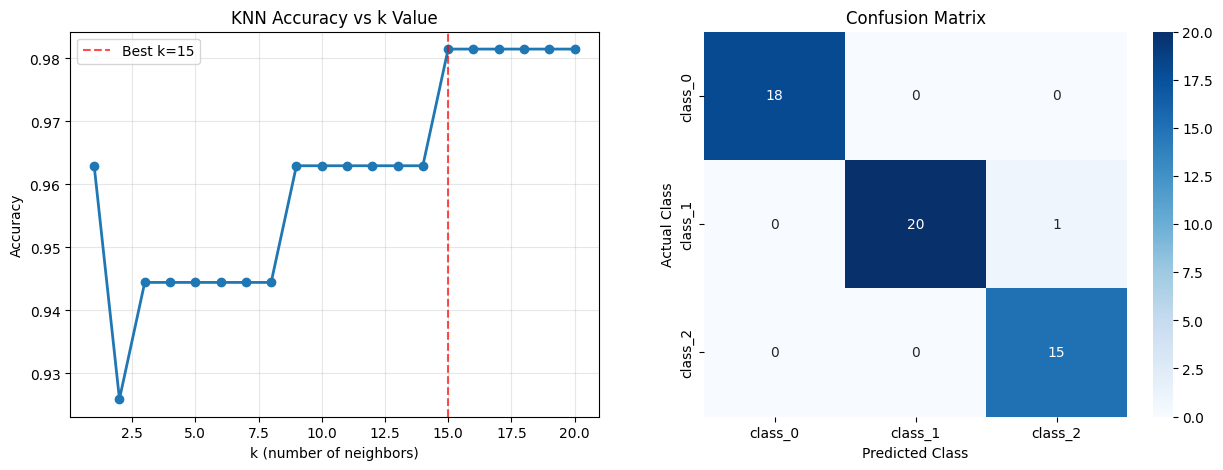

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: K value vs Accuracy
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(possible_K_Values, accurarcy_results, marker='o', linewidth=2, markersize=6)
plt.axvline(x=best_K_Value, color='red', linestyle='--', alpha=0.7, label=f'Best k={best_K_Value}')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=wine_dataset.target_names, 
            yticklabels=wine_dataset.target_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')

plt.show()

#### **9) Visualize the  Wine Features**

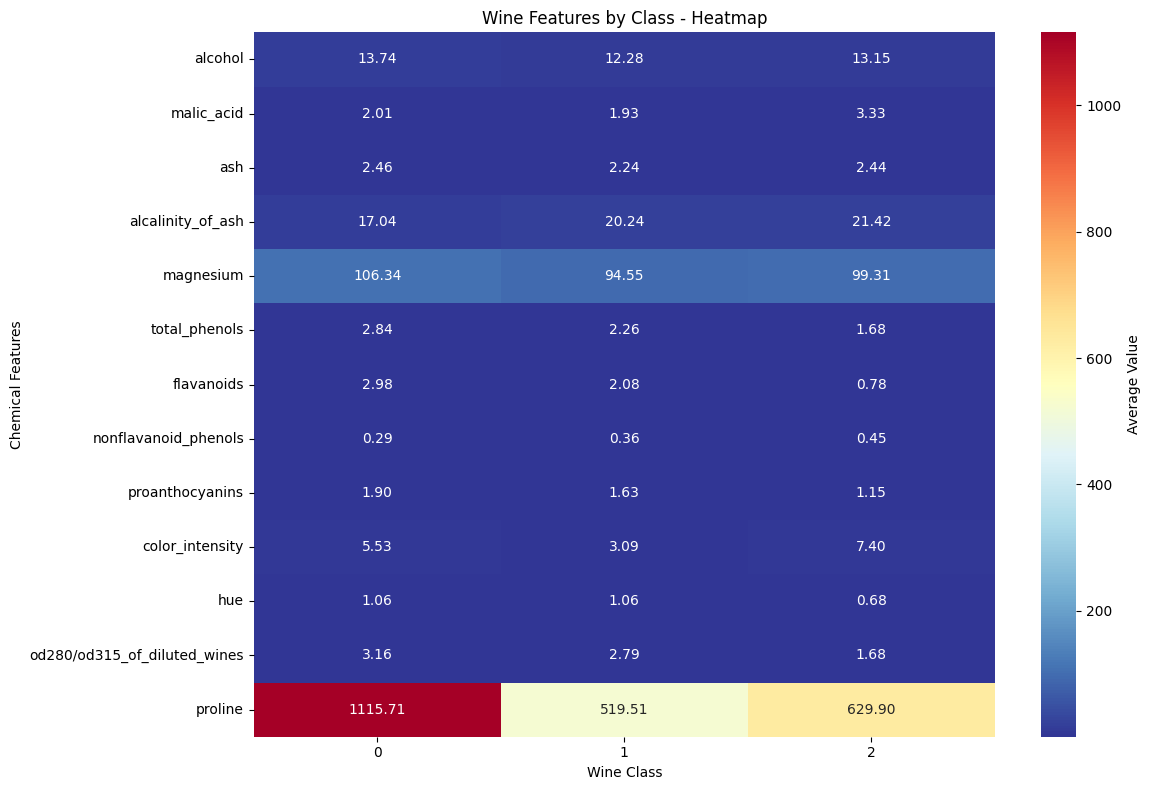

<Figure size 1200x800 with 0 Axes>

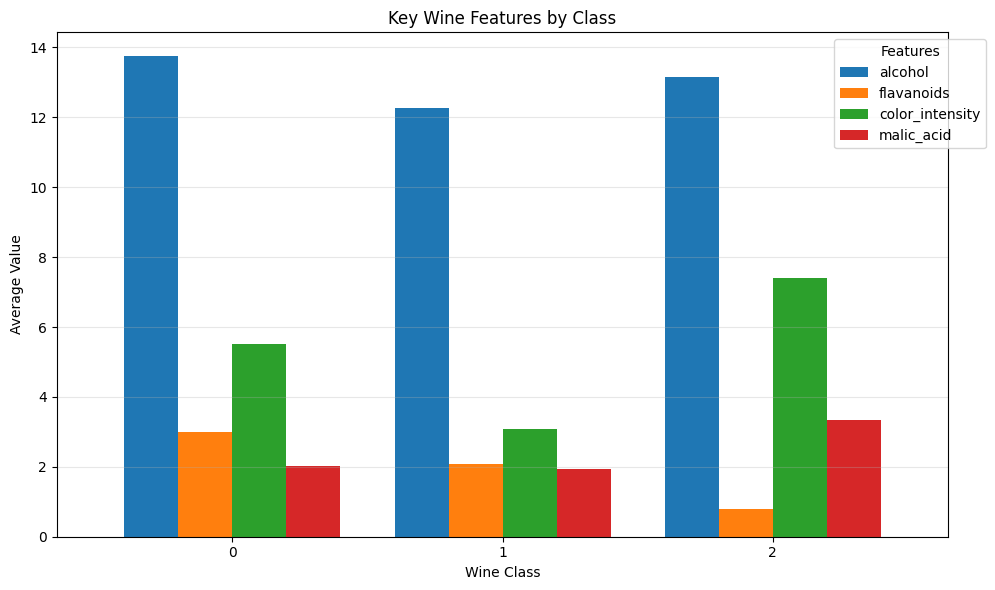

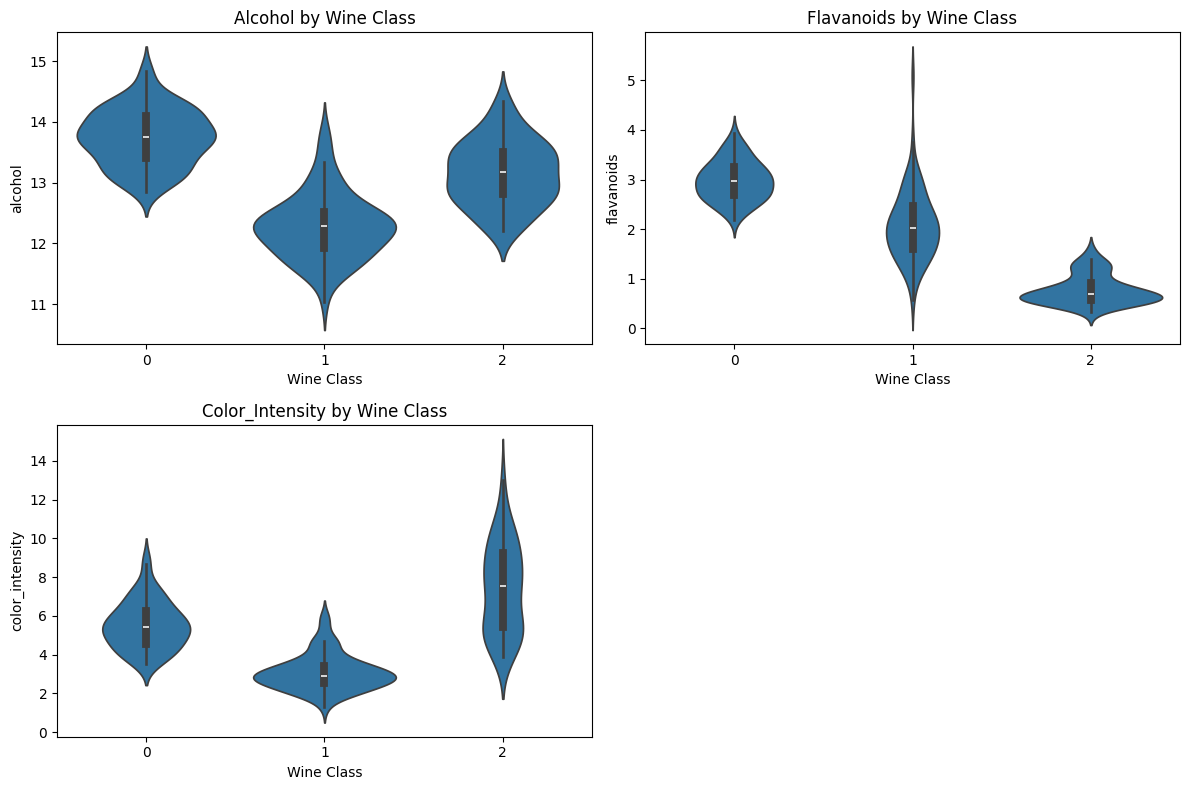

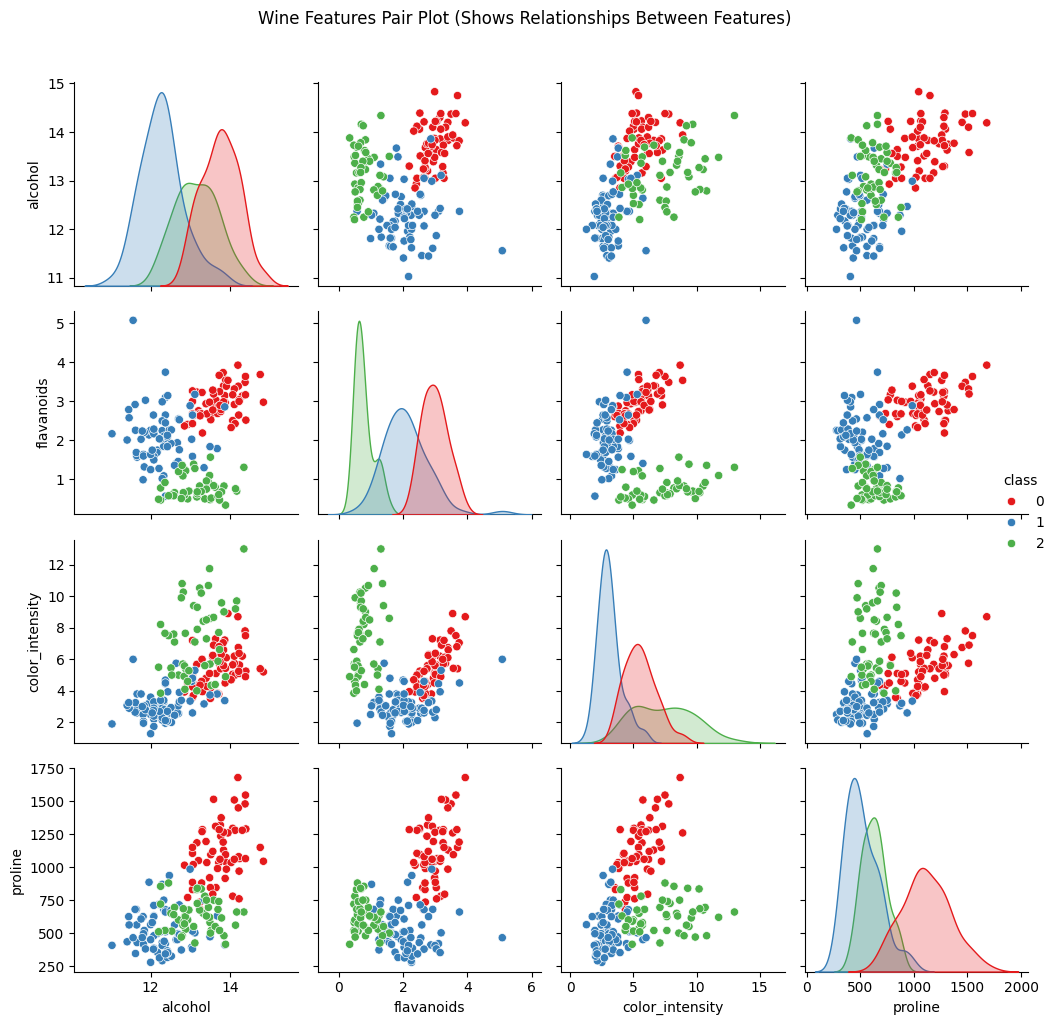

In [61]:
# Feature comparison plot

feature_stats = pd.DataFrame(x_data, columns=wine_dataset.feature_names)
feature_stats['class'] = y_data

# Plot 1: Heatmap (Best for showing all features at once)
plt.figure(figsize=(12, 8))
feature_comparison = feature_stats.groupby('class').mean()
sns.heatmap(feature_comparison.T, annot=True, cmap='RdYlBu_r', 
            fmt='.2f', cbar_kws={'label': 'Average Value'})
plt.title('Wine Features by Class - Heatmap')
plt.xlabel('Wine Class')
plt.ylabel('Chemical Features')
plt.tight_layout()
plt.show()

# Plot 2: Grouped Bar Chart 
plt.figure(figsize=(12, 8))
key_features = ['alcohol', 'flavanoids', 'color_intensity', 'malic_acid']
feature_comparison = feature_stats.groupby('class')[key_features].mean()

ax = feature_comparison.plot(kind='bar', width=0.8, figsize=(10, 6))
plt.title('Key Wine Features by Class')
plt.xlabel('Wine Class')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Violin Plot (Shows Distribution)
plt.figure(figsize=(12, 8))
key_features = ['alcohol', 'flavanoids', 'color_intensity']
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=feature_stats, x='class', y=feature)
    plt.title(f'{feature.title()} by Wine Class')
    plt.xlabel('Wine Class')
plt.tight_layout()
plt.show()

# Plot 4: Pair Plot (Shows relationships between features)
key_features = ['alcohol', 'flavanoids', 'color_intensity', 'proline']
plot_data = feature_stats[key_features + ['class']]
sns.pairplot(plot_data, hue='class', diag_kind='kde', palette='Set1')
plt.suptitle('Wine Features Pair Plot (Shows Relationships Between Features)', y=1.02)
plt.tight_layout()
plt.show()

#### **9) Make a New Prediction with a New Data**

In [62]:
# Make a New Predication on the New Wine
new_wine = [13.2, 2.8, 2.4, 20.0, 104, 1.9, 2.2, 0.3, 1.1, 2.8, 1.0, 2.9, 600]

print("Predicting Wine Class for New Sample:")
print("New wine chemical analysis:")
print(f"1) Alcohol: {new_wine[0]}%")
print(f"2) Malic acid: {new_wine[1]}")
print(f"3) Color intensity: {new_wine[9]}")
print(f"4) Proline: {new_wine[12]} mg/L")

# Perform a Feature Scale of the New Sample
new_wine_scaled = scaler.transform([new_wine])

# Make Prediction with the New Model
prediction = final_KNN_Model.predict(new_wine_scaled)
predction_probability = final_KNN_Model.predict_proba(new_wine_scaled)

print(f"\nClass Prediction: {wine_dataset.target_names[prediction[0]]}")
print(f"Confidence scores:")
for i, probability in enumerate(predction_probability[0]):
    print(f"{i+1}) {wine_dataset.target_names[i]}: {probability*100:.1f}%")

Predicting Wine Class for New Sample:
New wine chemical analysis:
1) Alcohol: 13.2%
2) Malic acid: 2.8
3) Color intensity: 2.8
4) Proline: 600 mg/L

Class Prediction: class_1
Confidence scores:
1) class_0: 33.3%
2) class_1: 66.7%
3) class_2: 0.0%
